In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIG_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [46]:
data_cg = np.load('../../../../deterministic/224x32/data_at_more_obs_points_config1/coarse_grained_vel_temp_data_t=35.0_to_t=45.0_grid_32_more_obs_config1.npz')



In [47]:
ua_truth = data_cg['ua_truth'] # t35 to t45
Ta_truth = data_cg['Ta_truth'] # t35 to t45

In [48]:
ua_truth.shape

(11, 84, 2)

In [49]:
gridpoints = data_cg['gridpoints']
print(f'gridpoints: {gridpoints}')

gridpoints: [[0.   0.25]
 [0.25 0.25]
 [0.5  0.25]
 [0.75 0.25]
 [1.   0.25]
 [1.25 0.25]
 [1.5  0.25]
 [1.75 0.25]
 [2.   0.25]
 [2.25 0.25]
 [2.5  0.25]
 [2.75 0.25]
 [3.   0.25]
 [3.25 0.25]
 [3.5  0.25]
 [3.75 0.25]
 [4.   0.25]
 [4.25 0.25]
 [4.5  0.25]
 [4.75 0.25]
 [5.   0.25]
 [5.25 0.25]
 [5.5  0.25]
 [5.75 0.25]
 [6.   0.25]
 [6.25 0.25]
 [6.5  0.25]
 [6.75 0.25]
 [0.   0.5 ]
 [0.25 0.5 ]
 [0.5  0.5 ]
 [0.75 0.5 ]
 [1.   0.5 ]
 [1.25 0.5 ]
 [1.5  0.5 ]
 [1.75 0.5 ]
 [2.   0.5 ]
 [2.25 0.5 ]
 [2.5  0.5 ]
 [2.75 0.5 ]
 [3.   0.5 ]
 [3.25 0.5 ]
 [3.5  0.5 ]
 [3.75 0.5 ]
 [4.   0.5 ]
 [4.25 0.5 ]
 [4.5  0.5 ]
 [4.75 0.5 ]
 [5.   0.5 ]
 [5.25 0.5 ]
 [5.5  0.5 ]
 [5.75 0.5 ]
 [6.   0.5 ]
 [6.25 0.5 ]
 [6.5  0.5 ]
 [6.75 0.5 ]
 [0.   0.75]
 [0.25 0.75]
 [0.5  0.75]
 [0.75 0.75]
 [1.   0.75]
 [1.25 0.75]
 [1.5  0.75]
 [1.75 0.75]
 [2.   0.75]
 [2.25 0.75]
 [2.5  0.75]
 [2.75 0.75]
 [3.   0.75]
 [3.25 0.75]
 [3.5  0.75]
 [3.75 0.75]
 [4.   0.75]
 [4.25 0.75]
 [4.5  0.75]
 [4.75 0.75]


In [50]:
ua_truth.shape, Ta_truth.shape

((11, 84, 2), (11, 84))

In [51]:
n_tsteps = 11 
n_obs_points = gridpoints.shape[0]
n_stoch = 50

In [52]:
vel_x_mean_mat = np.zeros((n_tsteps,n_obs_points))
vel_x_std_mat = np.zeros((n_tsteps,n_obs_points))

vel_y_mean_mat = np.zeros((n_tsteps,n_obs_points))
vel_y_std_mat = np.zeros((n_tsteps,n_obs_points))

temp_data_mean_mat = np.zeros((n_tsteps,n_obs_points))
temp_data_std_mat = np.zeros((n_tsteps,n_obs_points))

vel_x_rmse_mat = np.zeros((n_tsteps,n_obs_points))
vel_y_rmse_mat = np.zeros((n_tsteps,n_obs_points))
temp_rmse_mat = np.zeros((n_tsteps,n_obs_points))

for l in range(n_obs_points):
    vel_x_data_stoch_mat = np.zeros((n_tsteps,n_stoch)) # at a location
    vel_y_data_stoch_mat = np.zeros((n_tsteps,n_stoch))
    temp_data_stoch_mat = np.zeros((n_tsteps,n_stoch)) # at a location

    for k in range(n_stoch):
        data_stoch = np.load('../../data_stoch_more_obs/vel_temp_data_particle_'+str(k+1)+'_var_99_grid_32_t35_onwards_OU_rand_ic_m_obs.npz')

        vel_data_stoch = data_stoch['ua_data_sto']  
        vel_x_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 0]
        vel_y_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 1]

        temp_data_stoch = data_stoch['Ta_data_sto'] 
        temp_data_stoch_mat[:,k] = temp_data_stoch[:n_tsteps,l]


    vel_x_rmse = np.sqrt(np.mean(np.square(vel_x_data_stoch_mat - ua_truth[:n_tsteps,l,0].reshape((-1,1))), axis = 1, keepdims=True))
    vel_y_rmse = np.sqrt(np.mean(np.square(vel_y_data_stoch_mat - ua_truth[:n_tsteps,l,1].reshape((-1,1))), axis = 1, keepdims=True))
    temp_rmse = np.sqrt(np.mean(np.square(temp_data_stoch_mat - Ta_truth[:n_tsteps,l].reshape((-1,1))), axis = 1, keepdims=True))

    vel_x_data_mean = np.mean(vel_x_data_stoch_mat, axis = 1, keepdims=True)
    vel_x_data_std = np.std(vel_x_data_stoch_mat, axis = 1, keepdims=True)

    vel_y_data_mean = np.mean(vel_y_data_stoch_mat, axis = 1, keepdims=True)
    vel_y_data_std = np.std(vel_y_data_stoch_mat, axis = 1, keepdims=True)

    temp_data_mean = np.mean(temp_data_stoch_mat, axis = 1, keepdims=True)
    temp_data_std = np.std(temp_data_stoch_mat, axis = 1, keepdims=True)

    vel_x_mean_mat[:,l] = vel_x_data_mean[:,0]
    vel_x_std_mat[:,l] = vel_x_data_std[:,0]

    vel_y_mean_mat[:,l] = vel_y_data_mean[:,0]
    vel_y_std_mat[:,l] = vel_y_data_std[:,0]

    temp_data_mean_mat[:,l] = temp_data_mean[:,0]
    temp_data_std_mat[:,l] = temp_data_std[:,0]

    vel_x_rmse_mat[:,l] =  vel_x_rmse[:,0]
    vel_y_rmse_mat[:,l] =  vel_y_rmse[:,0]
    temp_rmse_mat[:,l] = temp_rmse[:,0]

ux_spread_sto = vel_x_std_mat
uy_spread_sto = vel_y_std_mat
temp_spread_sto = temp_data_std_mat

ux_abs_bias_sto = np.abs(vel_x_mean_mat - ua_truth[:n_tsteps,:,0])
uy_abs_bias_sto = np.abs(vel_y_mean_mat - ua_truth[:n_tsteps,:,1])
temp_abs_bias_sto = np.abs(temp_data_mean_mat - Ta_truth[:n_tsteps,:])

ux_rmse_sto = vel_x_rmse_mat
uy_rmse_sto = vel_y_rmse_mat
temp_rmse_sto = temp_rmse_mat


In [53]:
vel_x_mean_mat = np.zeros((n_tsteps,n_obs_points))
vel_x_std_mat = np.zeros((n_tsteps,n_obs_points))

vel_y_mean_mat = np.zeros((n_tsteps,n_obs_points))
vel_y_std_mat = np.zeros((n_tsteps,n_obs_points))

temp_data_mean_mat = np.zeros((n_tsteps,n_obs_points))
temp_data_std_mat = np.zeros((n_tsteps,n_obs_points))

vel_x_rmse_mat = np.zeros((n_tsteps,n_obs_points))
vel_y_rmse_mat = np.zeros((n_tsteps,n_obs_points))
temp_rmse_mat = np.zeros((n_tsteps,n_obs_points))

for l in range(n_obs_points):
    vel_x_data_stoch_mat = np.zeros((n_tsteps,n_stoch)) # at a location
    vel_y_data_stoch_mat = np.zeros((n_tsteps,n_stoch))
    temp_data_stoch_mat = np.zeros((n_tsteps,n_stoch)) # at a location

    for k in range(n_stoch):
        data_stoch = np.load('../../data_stoch_more_obs/vel_temp_data_ensem_sim_no_xi_det_ocean_particle_'+str(k+1)+'_grid_32_t35_onwards_rand_ic_m_obs.npz')

        vel_data_stoch = data_stoch['ua_data_sto']  
        vel_x_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 0]
        vel_y_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 1]

        temp_data_stoch = data_stoch['Ta_data_sto'] 
        temp_data_stoch_mat[:,k] = temp_data_stoch[:n_tsteps,l]


    vel_x_rmse = np.sqrt(np.mean(np.square(vel_x_data_stoch_mat - ua_truth[:n_tsteps,l,0].reshape((-1,1))), axis = 1, keepdims=True))
    vel_y_rmse = np.sqrt(np.mean(np.square(vel_y_data_stoch_mat - ua_truth[:n_tsteps,l,1].reshape((-1,1))), axis = 1, keepdims=True))
    temp_rmse = np.sqrt(np.mean(np.square(temp_data_stoch_mat - Ta_truth[:n_tsteps,l].reshape((-1,1))), axis = 1, keepdims=True))
    
    vel_x_data_mean = np.mean(vel_x_data_stoch_mat, axis = 1, keepdims=True)
    vel_x_data_std = np.std(vel_x_data_stoch_mat, axis = 1, keepdims=True)

    vel_y_data_mean = np.mean(vel_y_data_stoch_mat, axis = 1, keepdims=True)
    vel_y_data_std = np.std(vel_y_data_stoch_mat, axis = 1, keepdims=True)

    temp_data_mean = np.mean(temp_data_stoch_mat, axis = 1, keepdims=True)
    temp_data_std = np.std(temp_data_stoch_mat, axis = 1, keepdims=True)

    vel_x_mean_mat[:,l] = vel_x_data_mean[:,0]
    vel_x_std_mat[:,l] = vel_x_data_std[:,0]

    vel_y_mean_mat[:,l] = vel_y_data_mean[:,0]
    vel_y_std_mat[:,l] = vel_y_data_std[:,0]

    temp_data_mean_mat[:,l] = temp_data_mean[:,0]
    temp_data_std_mat[:,l] = temp_data_std[:,0]

    vel_x_rmse_mat[:,l] =  vel_x_rmse[:,0]
    vel_y_rmse_mat[:,l] =  vel_y_rmse[:,0]
    temp_rmse_mat[:,l] = temp_rmse[:,0]

ux_spread_det = vel_x_std_mat
uy_spread_det = vel_y_std_mat
temp_spread_det = temp_data_std_mat

ux_abs_bias_det = np.abs(vel_x_mean_mat - ua_truth[:n_tsteps,:,0])
uy_abs_bias_det = np.abs(vel_y_mean_mat - ua_truth[:n_tsteps,:,1])
temp_abs_bias_det = np.abs(temp_data_mean_mat - Ta_truth[:n_tsteps,:])

ux_rmse_det = vel_x_rmse_mat
uy_rmse_det = vel_y_rmse_mat
temp_rmse_det = temp_rmse_mat

# Average spread and ME

In [54]:
ux_spread_sto_av = np.mean(ux_spread_sto, axis=1)
uy_spread_sto_av = np.mean(uy_spread_sto, axis=1)
temp_spread_sto_av = np.mean(temp_spread_sto, axis=1)

ux_spread_det_av = np.mean(ux_spread_det, axis=1)
uy_spread_det_av = np.mean(uy_spread_det, axis=1)
temp_spread_det_av = np.mean(temp_spread_det, axis=1)

ux_bias_sto_av = np.mean(ux_abs_bias_sto, axis=1)
uy_bias_sto_av = np.mean(uy_abs_bias_sto, axis=1)
temp_bias_sto_av = np.mean(temp_abs_bias_sto, axis=1)

ux_bias_det_av = np.mean(ux_abs_bias_det, axis=1)
uy_bias_det_av = np.mean(uy_abs_bias_det, axis=1)
temp_bias_det_av = np.mean(temp_abs_bias_det, axis=1)

ux_rmse_sto_av = np.mean(ux_rmse_sto, axis=1)
uy_rmse_sto_av = np.mean(uy_rmse_sto, axis=1)
temp_rmse_sto_av = np.mean(temp_rmse_sto, axis=1)

ux_rmse_det_av = np.mean(ux_rmse_det, axis=1)
uy_rmse_det_av = np.mean(uy_rmse_det, axis=1)
temp_rmse_det_av = np.mean(temp_rmse_det, axis=1)

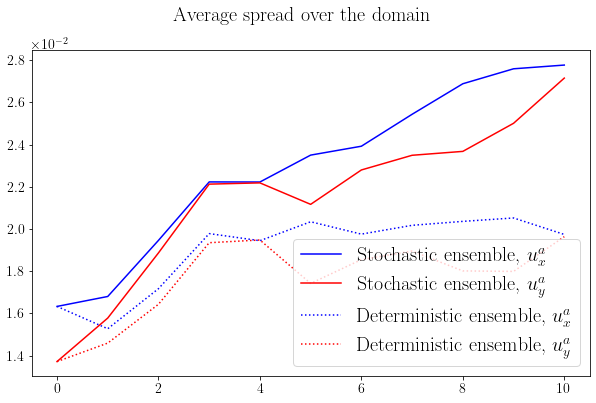

In [55]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(ux_spread_sto_av, color='b', label=r'Stochastic ensemble, $u_x^a$')
ax.plot(uy_spread_sto_av, color='r', label=r'Stochastic ensemble, $u_y^a$')
ax.plot(ux_spread_det_av, color='b', linestyle ='dotted', label=r'Deterministic ensemble, $u_x^a$')
ax.plot(uy_spread_det_av, color='r', linestyle ='dotted', label=r'Deterministic ensemble, $u_y^a$')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,11,2))
# fig.legend(loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=2)
fig.suptitle(r'Average spread over the domain')
ax.legend()
plt.savefig('../../plots/t35_onwards_xi_from_t25_to_t45/avg_spread_ux_uy_stoch_v_det.pdf',bbox_inches='tight')


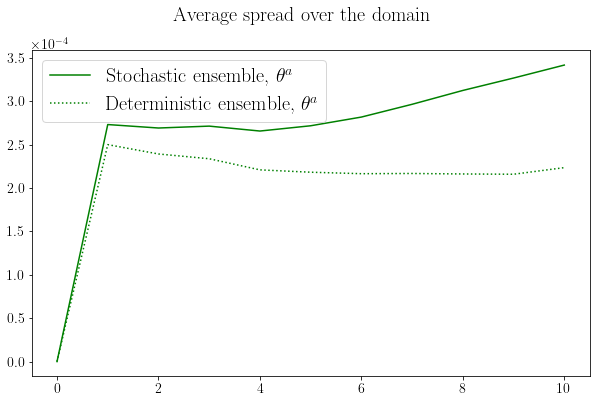

In [56]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(temp_spread_sto_av, color='g', label=r'Stochastic ensemble, $\theta^a$')
ax.plot(temp_spread_det_av, color='g', linestyle ='dotted', label=r'Deterministic ensemble, $\theta^a$')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,11,2))
# fig.legend(loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=2)
fig.suptitle(r'Average spread over the domain')
ax.legend()
plt.savefig('../../plots/t35_onwards_xi_from_t25_to_t45/avg_spread_temp_stoch_v_det.pdf',bbox_inches='tight')



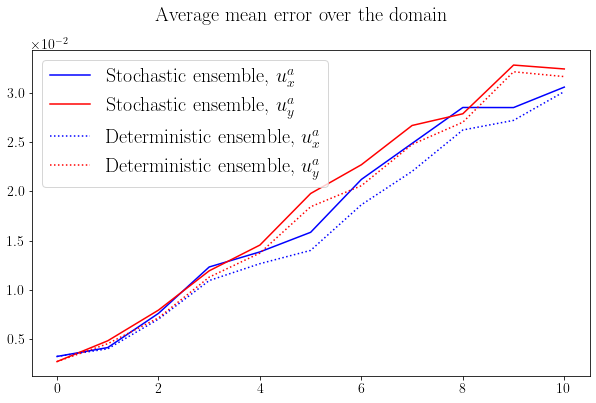

In [57]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(ux_bias_sto_av, color='b', label=r'Stochastic ensemble, $u_x^a$')
ax.plot(uy_bias_sto_av, color='r', label=r'Stochastic ensemble, $u_y^a$')
ax.plot(ux_bias_det_av, color='b', linestyle ='dotted', label=r'Deterministic ensemble, $u_x^a$')
ax.plot(uy_bias_det_av, color='r', linestyle ='dotted', label=r'Deterministic ensemble, $u_y^a$')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,11,2))
# fig.legend(loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=2)
fig.suptitle(r'Average mean error over the domain')
ax.legend()
plt.savefig('../../plots/t35_onwards_xi_from_t25_to_t45/avg_ME_ux_uy_stoch_v_det.pdf',bbox_inches='tight')



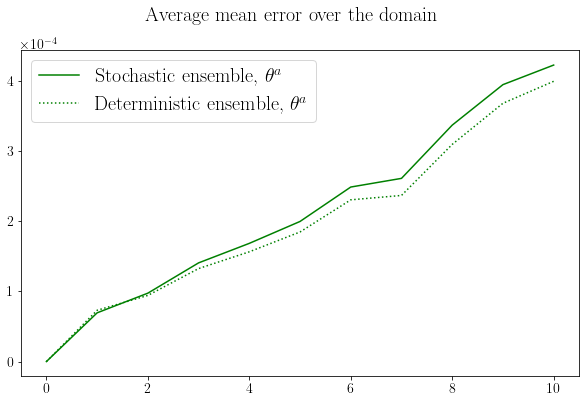

In [58]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(temp_bias_sto_av, color='g', label=r'Stochastic ensemble, $\theta^a$')
ax.plot(temp_bias_det_av, color='g', linestyle ='dotted', label=r'Deterministic ensemble, $\theta^a$')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,11,2))
# fig.legend(loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=2)
fig.suptitle(r'Average mean error over the domain')
ax.legend()
plt.savefig('../../plots/t35_onwards_xi_from_t25_to_t45/avg_ME_temp_stoch_v_det.pdf',bbox_inches='tight')


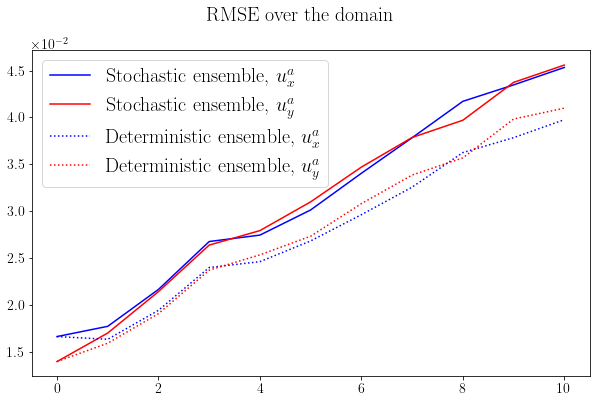

In [59]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(ux_rmse_sto_av, color='b', label=r'Stochastic ensemble, $u_x^a$')
ax.plot(uy_rmse_sto_av, color='r', label=r'Stochastic ensemble, $u_y^a$')
ax.plot(ux_rmse_det_av, color='b', linestyle ='dotted', label=r'Deterministic ensemble, $u_x^a$')
ax.plot(uy_rmse_det_av, color='r', linestyle ='dotted', label=r'Deterministic ensemble, $u_y^a$')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,11,2))
# fig.legend(loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=2)
fig.suptitle(r'RMSE over the domain')
ax.legend()
plt.savefig('../../plots/t35_onwards_xi_from_t25_to_t45/avg_rmse_ux_uy_stoch_v_det.pdf',bbox_inches='tight')



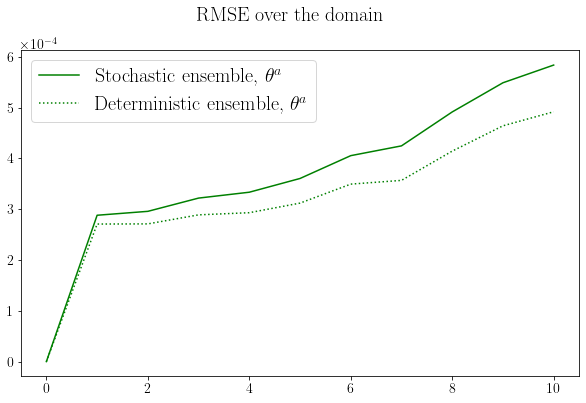

In [60]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(temp_rmse_sto_av, color='g', label=r'Stochastic ensemble, $\theta^a$')
ax.plot(temp_rmse_det_av, color='g', linestyle ='dotted', label=r'Deterministic ensemble, $\theta^a$')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,11,2))
# fig.legend(loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=2)
fig.suptitle(r'RMSE over the domain')
ax.legend()
plt.savefig('../../plots/t35_onwards_xi_from_t25_to_t45/avg_rmse_temp_stoch_v_det.pdf',bbox_inches='tight')
